## Data Exploration

Exploring data is generally performed presenting a meaningful synthesis of its distribution---let it be through a sequence of graphs, by describing it with a set of numerical parameters, or by approximating it with simple functions.  Let us explore now different possibilities, and how to accomplish them with different tools in the `scipy` stack:

### Picturing Distributions with Graphs

The kind of graph depends on the type of variable (categorical, quantitative, or dates).

#### Bar plots, Pie charts

When our data is described in terms of categorical variables, we often use *pie charts* or *bar graphs* to represent it.  For example, we access the *Consumer Complaint Database* from the Consumer Financial Protection Bureau, at catalog.data.gov/dataset/consumer-complaint-database.  The database was created on February 2014 to contain complaints received by the Bureau about financial products and services.  In its updated version on March of the same year, it consisted on almost 300,000 complaints acquired since November 2011.

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("Consumer_Complaints.csv", low_memory=False, parse_dates=[8,9])

data.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1015754,Debt collection,"Other (phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,NY,11433,Web,2014-09-05,2014-09-05,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
1,1015827,Debt collection,NaN,Improper contact or sharing of info,Contacted me after I asked not to,VT,5446,Web,2014-09-05,2014-09-05,"Southwest Credit Systems, L.P.",In progress,Yes,NaN
2,1016131,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,TX,77511,Web,2014-09-05,2014-09-05,"Expert Global Solutions, Inc.",In progress,Yes,NaN
3,1015974,Bank account or service,Checking account,Problems caused by my funds being low,NaN,FL,32162,Web,2014-09-05,2014-09-05,"FNIS (Fidelity National Information Services, ...",Closed with explanation,Yes,NaN
4,1015831,Bank account or service,Checking account,Problems caused by my funds being low,NaN,TX,77584,Web,2014-09-05,2014-09-05,JPMorgan Chase,Closed with explanation,Yes,NaN


> We downloaded the database in the simplest format they offer: a comma-separated-value file.  We do so from `pandas` with the command `read_csv`.  If we desired to download the database in other formats (`JSON`, excel, etc), we only need to adjust the reading command accordingly.

>        >>> pandas.read_csv("Consumer_Complaints.csv")    # CSV
>        >>> pandas.read_json("Consumer_Complaints.json")  # JSON
>        >>> pandas.read_excel("Consumer_Complaints.xls")  # XLS

> Even more amazingly so, it is possible to retrieve the data online (no need to save to our computer!), if we know its url:

>        >>> url = "https://data.consumerfinance.gov/api/views/x94z-ydhh/rows.csv?accessType=DOWNLOAD"
>        >>> data = pd.read_csv(url)

> If the database contains non-trivial data, the parser might get confused with the corresponding `dtype`.  In that case, we request the parser to try and resolve that situation, at the expense of using more memory resources.  We do so by including the optional boolean flag `low_memory = False`, as it was the case in our running example.

> Also, note how we specified `parse_dates=True`.  An initial exploration of the file with the data showed that both the eighth and ninth columns represent dates.  The library `pandas` has great capability to manipulate those without resorting to complicated `str` operations, and thus we indicate the reader to transform those columns to the proper format.  This will ease our treatment of the data later on.

Let us present now a bar plot indicating how many of these different complaints per company are on each Product.

In [5]:
data.groupby('Product').size()

Product
Bank account or service     35408
Consumer loan                8164
Credit card                 39054
Credit reporting            35645
Debt collection             37592
Money transfers              1335
Mortgage                   117929
Payday loan                  1223
Student loan                 8646
dtype: int64

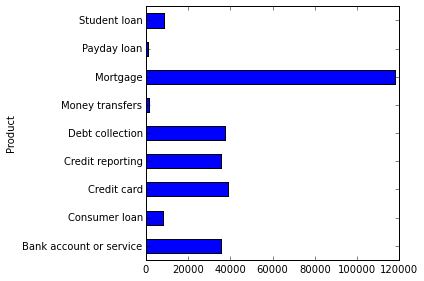

In [6]:
_.plot(kind='barh')
plt.tight_layout()
plt.show()

This gives us this interesting horizontal bar plot, showing the volume of complaints for each different product, from November 2011 to September 2014.

> The `groupby` method on `pandas` dataframes is equivalent to `GROUP BY` in `SQL`.   For a complete explanation of all `SQL` commands and their equivalent dataframe methods in `pandas`, there is a great resource online at pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

Another informative type of bar plot is achieved by stacking the bars properly.  For instance, if we focus on complaints about mortgages on the midwest during the years 2012 and 2013, we could issue the following commands

In [7]:
midwest = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'IL', 'IN', 'OH', 'WI', 'MI']

df = data[data.Product == 'Mortgage']
df['Year'] = df['Date received'].map(lambda t: t.year)
df = df.groupby(['State','Year']).size()
df[midwest].unstack().ix[:, 2012:2013]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Year,2012,2013
State,,
ND,14,20
SD,33,34
NE,109,120
KS,146,169
MN,478,626
IA,99,125
MO,519,627
IL,1176,1609
IN,306,412


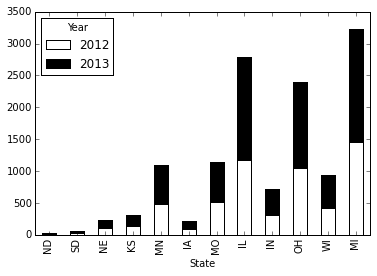

In [8]:
_.plot(kind="bar", stacked=True, colormap='Greys')
plt.show()

The graph clearly illustrates how the year 2013 gave rise to a much higher volume of complaints in these states.

We may be inclined to think, in view of the previous graphs, that in every state or territory of the United States, mortgages is the _number one_ complaint.  A pie chart showing the volumes of complaints per product in Puerto Rico alone, from November 2011 until September 2014, tells us differently.

In [9]:
data[data.State=='PR'].groupby('Product').size()

Product
Bank account or service     81
Consumer loan               20
Credit card                149
Credit reporting           139
Debt collection             62
Mortgage                   110
Student loan                11
dtype: int64

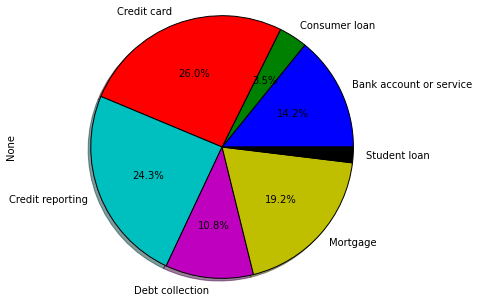

In [10]:
_.plot(kind='pie', shadow=True, autopct="%1.1f%%")
plt.axis('equal')
plt.tight_layout()
plt.show()

The diagram illustrates how credit cards and credit reports are the main source for complaints in these islands.

#### Histograms

For quantitative variables, we employ a *histogram*.   In the previous section, we saw an example of construction of a histogram from 10,000 throws of four dice.  In this section, we produce another histogram from within `pandas`.  In this case, we would like to present a histogram that analyzes the ratio of daily complaints on credit cards against the daily complaints on mortgages.

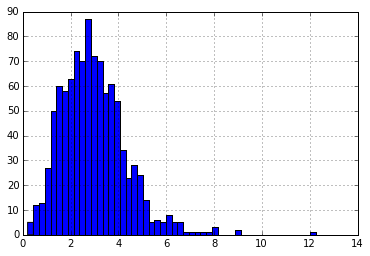

In [11]:
df = data.groupby(['Date received', 'Product']).size().unstack()

ratios = df['Mortgage'] / df['Credit card']

ratios.hist(bins=50)
plt.show()

The resulting graph indicates, for instance, that there are a few days in which the number of complaints on mortgages is about 12 times the number of complaints on credit cards.  It also shows that the most frequent situation is that of days in which the number of complaints on mortgages roughly triplicates the number of credit card complaints.

#### Time plots

For variables measured at intervals over time, we employ a *time plot*.  The library `pandas` handles these beautifully.  For instance, to observe the amount of daily complaints received from January 1st, 2012 to December 31st, 2013, we issue

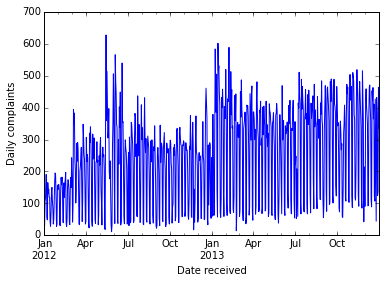

In [12]:
ts = data.groupby('Date received').size()
ts = ts['2012':'2013']
ts.plot()
plt.ylabel('Daily complaints')
plt.show()

Note both the oscillating nature of the graph, as well as the slight upward trend in complaints during this period.  We also observe what looks like a few outliers---one in March 2012, a few more in between May and June of the same year, and a few more in January and February 2013.

### Describing Distributions with Numbers, Boxplots

We request the usual parameters for each dataset:

* *Mean* (arithmetic, geometric or harmonic) and *Median* to measure the center of the data.
* *Quartiles*, *variance*, *standard deviation*, or *standard error of the mean*, to measure the spread of the data.
* *Central moments*, *skewness* and *kurtosis* to measure the degree of symmetry in the distribution of the data.
* *mode* to find the most common values in the data.
* _Trimmed_ versions of the previous parameters, to better describe the distribution of the data reducing the effect of outliers.

A good way to present some of the preceding information is by means of the *five-number summary*, or with a *boxplot*.

Let us illustrate how to achieve these basic measurements both in `pandas` (left columns) and with the `scipy.stats` libraries (right columns):


In [13]:
ts.describe()

count    731.000000
mean     247.333789
std      147.020335
min        9.000000
25%      101.000000
50%      267.000000
75%      364.000000
max      628.000000
dtype: float64

In [16]:
import scipy.stats

scipy.stats.describe(ts)

DescribeResult(nobs=731, minmax=(9, 628), mean=247.33378932968537, variance=21614.978843018569, skewness=0.012578861206579545, kurtosis=-1.1717653990872503)

This second output presents us with count (`731  = 366 + 365`); minimum and maximum values (`min=9`, `max=628`); arithmetic mean (`247`); unbiased variance (`21614`); biased skewness (`0.0126`), and biased kurtosis (`-1.1718`).

Other computations of parameters, with both `pandas` (mode and standard deviation) and `scipy.stats` (standard error of the mean, and trimmed variance of all values between 50 and 600).

In [17]:
ts.mode()

0    59
dtype: int64

In [18]:
ts.std()

147.02033479426774

In [19]:
scipy.stats.sem(ts)

5.4377435122312781

In [20]:
scipy.stats.tvar(ts, [50, 600])

17602.31862385101

> For a complete description of all statistical functions in the `scipy.stats` library, the best reference is the official documentation at docs.scipy.org/doc/scipy/reference/stats.html.  

> It is possible to ignore `NaN` values in computations of parameters.  Most dataframe and series methods in `pandas` do that automatically.  If a different behavior is required, we have the ability to substitute those `NaN` values for anything we deem appropriate.  For instance, if we wanted any of the computations above to take into account all dates, and not only the ones registered, we could impose a value of zero complaints in those events.  We do so with the method `dataframe.fillna(0)`

>        >>> ts.fillna(0);

> With the library `scipy.stats`, if we desire to ignore `NaN` values in an array, we use the same routines appending the keyword `nan` before their name.

>        >>> scipy.stats.nanmedian(ts)
>        267.0

> In any case, the time series we computed show absolutely no NaN's: there were at least 9 daily financial complaints each single day in the years 2012 and 2013.

Going back to complaints about mortgages on the Midwest.  To illustrate the power of boxplots, we are going to inquire the number of monthly complaints about mortgages in the year 2013, in each of those states.


In [21]:
in_midwest = data.State.map(lambda t: t in midwest)
mortgages = data.Product == 'Mortgage'
in_2013 = data['Date received'].map(lambda t: t.year==2013)
df = data[mortgages & in_2013 & in_midwest]
df['month'] = df['Date received'].map(lambda t: t.month)
df = df.groupby(['month', 'State']).size()
df.unstack()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


State,IA,IL,IN,KS,MI,MN,MO,ND,NE,OH,SD,WI
month,,,,,,,,,,,,
1,11,220,40,12,183,99,91,3,13,163,5,58
2,14,160,37,16,180,45,47,2,12,120,NaN,37
3,7,138,43,18,184,52,57,3,11,131,5,50
4,14,148,33,19,185,55,52,2,14,104,3,48
5,14,128,44,16,172,63,57,2,8,109,3,43
6,20,136,47,13,164,51,47,NaN,13,116,7,52
7,5,127,30,16,130,57,62,2,11,127,5,39
8,11,133,32,15,155,64,55,NaN,8,120,1,51
9,10,121,24,16,99,31,55,NaN,8,109,NaN,37


//anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


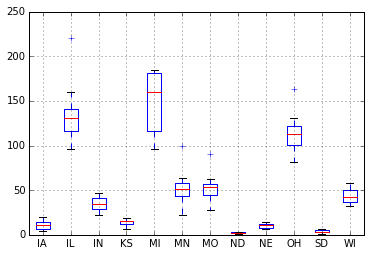

In [22]:
_.boxplot()
plt.show()

This boxplot illustrates how, among the states in the Midwest, Illinois, Ohio and Michigan have the largest amount of monthly complaints on mortgages.  In the case of Michigan (MI), for example, the corresponding boxplot indicates that the spread goes from 96, to 185 monthly complaints.  The median number of monthly complaints in that state is about 160.  The first and third quartiles are, respectively, 116 and 180.

A *violing plot* is a boxplot with a rotated kernel density estimation on each side.  This shows the probability density of the data at different values.  We may obtain these plots with the graphical routine `violinplot` from the`statsmodels` submodule `graphics.boxplots`.  Let us illustrate this kind of plot with the same data as before.

> Another option is a combination of a violin plot with a line-scatter plot of all individual data points.  We call this a *bean plot*, and we have an implementation with the routine `beanplot` in the same submodule `statsmodels.graphics.boxplot`.  

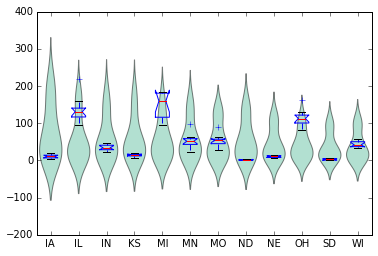

In [23]:
from statsmodels.graphics.boxplots import violinplot

df = df.unstack().fillna(0)

violinplot(df.values, labels=df.columns)
plt.show()

### Relationship between quantitative variables

To express the relationship between two quantitative variables, we resort to three techniques: 

* A *scatterplot* to visually identify that relationship. 
* The computation of a *correlation coefficient* that expresses how likely is that relationship to be formulated by a linear function.
* A *regression function* as a means to predict the value of one of the variables with respect to the other.

#### Scatterplots and correlation

For example, we are going to try to find any relation among the number of complaints on mortgages among four populous states---Illinois, New York, Texas, and California---and the territory of Puerto Rico.  We will compare the number of complaints on each month from December 2011 to September 2014.


In [24]:
from pandas.tools.plotting import scatter_matrix

year_month = lambda t: t.strftime("%Y/%m")

states = data.State.map(lambda t: t in ['PR', 'IL', 'NY', 'TX', 'CA'])
df = data[states & (data.Product=="Mortgage")]
df['month'] = df['Date received'].map(year_month)

df.groupby(['month', 'State']).size().unstack()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


State,CA,IL,NY,PR,TX
month,,,,,
2011/12,288,34,90,7,63
2012/01,444,77,90,2,104
2012/02,446,80,110,3,115
2012/03,605,78,179,3,128
2012/04,527,69,188,5,152
2012/05,782,100,242,3,151
2012/06,700,107,204,NaN,153
2012/07,668,114,198,3,153
2012/08,764,108,228,3,187


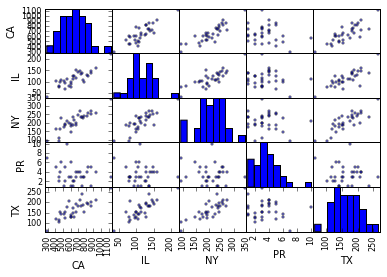

In [25]:
df = _.dropna()
scatter_matrix(df)
plt.show()

This gives the previous matrix of scatter plots between the data of each pair of states, and the histogram of the same data for each state.

For a grid of scatter plots with confidence ellipses added, we may use the routine `scatter_ellipse` from the graphics module `statsmodels.graphics.plot_grids` of the package `statsmodels`.


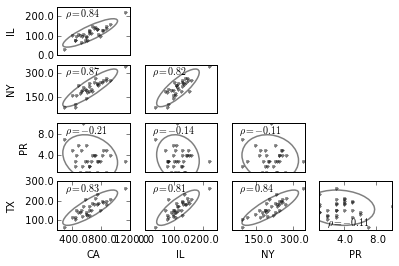

In [26]:
from statsmodels.graphics.plot_grids import scatter_ellipse

scatter_ellipse(df, varnames=df.columns)
plt.show()

Note how each diagram comes with an extra piece of information.  This is the corresponding *correlation coefficient* of the two variables (Pearson's, in this case).  Data that appears to be almost perfectly aligned gets a correlation coefficient very close to 1 in absolute value.  We may obtain all these coefficients as the `pandas` dataframe method `corr` as well.

In [27]:
df.corr(method="pearson")

State,CA,IL,NY,PR,TX
State,,,,,
CA,1.000000,0.844015,0.874480,-0.210216,0.831462
IL,0.844015,1.000000,0.818283,-0.141212,0.805006
NY,0.874480,0.818283,1.000000,-0.114270,0.837508
PR,-0.210216,-0.141212,-0.114270,1.000000,-0.107182
TX,0.831462,0.805006,0.837508,-0.107182,1.000000


> Besides the standard Pearson correlation coefficients, this method allows us to compute Kendall Tau for ordinal data (`kendall`), or Spearman rank (`spearman`).

> In the module `scipy.stats` we also have routines for the computation of these correlation coefficients. 

>    * `pearsonr` for Pearson's correlation coefficient and the p-value for testing non-correlation.
>    * `spearmanr` for Spearman rank-order correlation coefficient and the p-value to test for non-correlation.
>    * `kendalltau` for Kendall's tau.
>    * `pointbiserial` for the point biserial correlation coefficient and the associated p-value.

Another possibility of visually displaying the correlation is by means of color grids.  The graphic routine `plot_corr` from the submodule `statsmodels.graphics.correlation` gets the job done

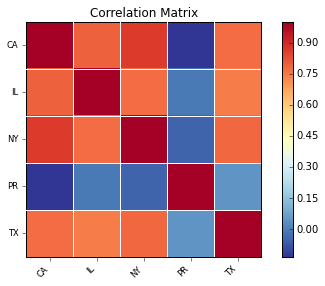

In [28]:
from statsmodels.graphics.correlation import plot_corr

plot_corr(df.corr(method='spearman'), xnames=df.columns.tolist())
plt.show()

The largest correlation happens between the states of New York and California (`0.874480`).  We will use the data corresponding to these two states for our subsequent examples in the next section.

#### Regression

Scatter plots helped us identify situations where the data could potentially be related by a functional relationship.  This allows us to formulate a rule to predict the value of a variable knowing the other.  When we suspect that such a formula exists, we desire to find a good approximation to it.  

We follow in this chapter the jargon of statisticians and data analysts; rather than referring to these as _approximations_, we will call them *regressions*.  We also append an adjective indicating the kind of formula we seek.  That way, we refer to *linear regression* if the function is linear, *polynomial regression* if it is a polynomial, etc.  Also, regressions do not necessarily involve only one variable in terms of another single variable.  We thus differentiate between *single-variable regression* and *multiple regression*.  Let us explore different settings for regression, and how to address them from the `scipy` stack.

##### Ordinary Linear Regression for moderate-size datasets
In any given case, we may employ the tools we learned during our exploration of approximation and interpolation in the least-squares sense, in Chapters 1 and 2.  There are many tools in the two libraries `scipy.stack`, and `statsmodels`, as well as the toolkit `scikit-learn` to perform this operation and associated analysis. 

* A basic routine to compute ordinary least-square regression lines, `linregress`, in the `scipy.stats` library.
* The class `LinearRegression` from the `scikit-learn` toolkit, at `sklearn.linear_model`.
* A set of different regression routines in the `statsmodel` libraries, with the assistance of the `patsy` package.

Let us start with the simplest method---via `linregress` in the `scipy.stats` library.  We want to explore the almost-linear relationship between the number of monthly complaints on mortgages in the states of California and New York.


In [29]:
x, y = df[['NY', 'CA']].T.values

slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)
print "Formula: CA = {0} + {1} * NY".format(intercept, slope)

Formula: CA = 65.7706648926 + 2.82130682025 * NY


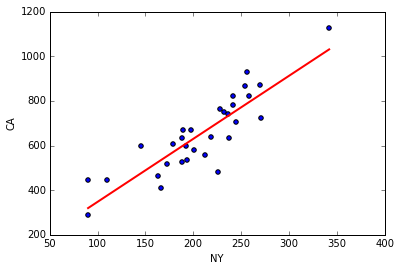

In [30]:
df[['NY', 'CA']].plot(kind='scatter', x='NY', y='CA')
xspan = np.linspace(x.min(), x.max())
plt.plot(xspan, intercept + slope * xspan, 'r-', lw=2)
plt.show()

Exactly the same result we obtain by using `LinearRegression` from the `scikit-learn` toolkit.


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = np.resize(x, (x.size, 1))

model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
model.intercept_

65.770664892647233

In [33]:
model.coef_

array([ 2.82130682])

For a more advanced treatment of this ordinary least-square regression line, offering more informative plots and summaries, we use the routine `ols` from `statsmodels`, and some of its awesome plotting utilities.  

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("CA ~ NY", data=df).fit()

print model.summary2()

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.757   
Dependent Variable: CA               AIC:                366.3982
Date:               2015-07-27 12:06 BIC:                369.2662
No. Observations:   31               Log-Likelihood:     -181.20 
Df Model:           1                F-statistic:        94.26   
Df Residuals:       29               Prob (F-statistic): 1.29e-10
R-squared:          0.765            Scale:              7473.2  
------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept    65.7707   62.2894  1.0559  0.2997  -61.6254  193.1667
NY            2.8213    0.2906  9.7085  0.0000    2.2270    3.4157
-----------------------------------------------------------------
Omnibus:               1.502        Durbin-Watson:          0.921
Prob(Omnibus):        

> Note the interesting method to express the fact that we would like to obtain a formula of the variable `CA` with respect to the variable `NY`: `CA ~ NY`.  This comfortable syntax is possible thanks to the library `patsy`, that takes care of making all the pertinent interpretations, and handling the corresponding data behind the scenes.

The fit may be visualized with the graphic routine `plot_fit` from the submodule `statsmodels.graphics.regressionplots`.

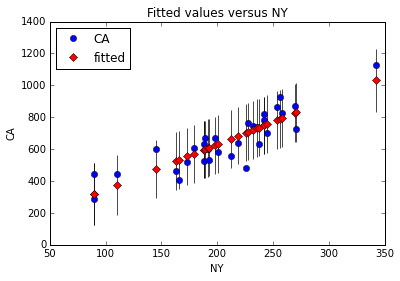

In [35]:
from statsmodels.graphics.regressionplots import plot_fit

plot_fit(model, 'NY')
plt.show()

Let us also illustrate how to perform multiple linear regression with `statsmodels`.  For the following example, we are going to gather the number of complaints during the year 2013, on three products that we suspect are related: We will try to find a formula that approximates the overall number of mortgage complaints as a function of the number of complaints on both credit cards and student loans.

In [36]:
products = ['Student loan', 'Credit card', 'Mortgage']
products = data.Product.map(lambda t: t in products)
df = data[products & in_2013]
df = df.groupby(['State', 'Product']).size().unstack().dropna()

X = df[['Credit card', 'Student loan']]
X = sm.add_constant(X)
y = df['Mortgage']

model = sm.OLS(y, X).fit()
print model.summary2()

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.914     
Dependent Variable: Mortgage         AIC:                827.7591  
Date:               2015-07-27 12:07 BIC:                833.7811  
No. Observations:   55               Log-Likelihood:     -410.88   
Df Model:           2                F-statistic:        286.6     
Df Residuals:       52               Prob (F-statistic): 8.30e-29  
R-squared:          0.917            Scale:              1.9086e+05
-------------------------------------------------------------------
                  Coef.  Std.Err.    t    P>|t|    [0.025   0.975] 
-------------------------------------------------------------------
const             2.1214  77.3360  0.0274 0.9782 -153.0648 157.3075
Credit card       6.0196   0.5020 11.9903 0.0000    5.0121   7.0270
Student loan     -9.9299   2.5666 -3.8688 0.0003  -15.0802  -4.7796
------------------------------------------------------------------

Note the value of `r`-squared, so close to 1.  This indicates that a linear formula has been computed and the corresponding model fits the data well.  We may now produce a visualization that shows it.

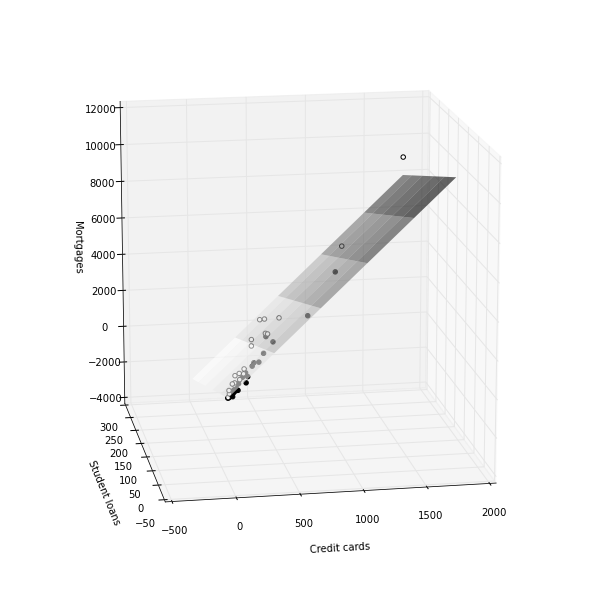

In [37]:
from mpl_toolkits.mplot3d import Axes3D

xspan = np.linspace(X['Credit card'].min(), X['Credit card'].max())
yspan = np.linspace(X['Student loan'].min(), X['Student loan'].max())
xspan, yspan = np.meshgrid(xspan, yspan)
Z = model.params[0] + model.params[1] * xspan + model.params[2] * yspan
resid = model.resid

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, azim=-100, elev=15)
surf = ax.plot_surface(xspan, yspan, Z, cmap=plt.cm.Greys, alpha=0.6, linewidth=0)
ax.scatter(X[resid>=0]['Credit card'], X[resid>=0]['Student loan'], y[resid >=0], 
           color = 'black', alpha=1.0, facecolor='white')
ax.scatter(X[resid<0]['Credit card'], X[resid<0]['Student loan'], y[resid<0], color='black', alpha=1.0)
ax.set_xlabel('Credit cards')
ax.set_ylabel('Student loans')
ax.set_zlabel('Mortgages')
plt.show()

The corresponding diagram shows data points above the plane in white, and points below the plane in black. The intensity of the plane is determined by the corresponding predicted values for the number of mortgage complaints (brighter = low residuals, darker = high residuals).


##### Ordinary Least-Squares Regression for large datasets

In the case of linear regression for large datasets---more than 100,000 samples---, optimal algorithms use *stochastic gradient descent learning* (*SGD regression*) with different *loss functions* and penalties.  We can access these with the class `SGDregressor` in `sklearn.linear_model`. 

##### Linear Regression beyond ordinary least-squares
In the general case of multiple linear regression, if no emphasis is to be made on a particular set of variables, we employ *ridge regression*.  We do so through the class `sklearn.linear_model.Ridge` in the `scikit-learn` toolkit.

Ridge regression is basically an ordinary least-squares algorithm with an extra penalty imposed on the size of the coefficients involved.  It is comparable in performance to ordinary least-squares too, since they both have roughly the same complexity.

In any given multiple linear regression, if we acknowledge that only a few variables have a strong impact over the overall regression, the preferred methods are *lasso* (*Least Absolute Shrinkage and Selection Operator*) and *Elastic Net*.   We choose lasso when the number of samples is much larger than the number of variables, and we seek a _sparse_ formula where most of the coefficients associated to non-important variables are zero.  

Elastic net is always the algorithm of choice when the number of variables is close to, or larger than the number of samples.

Both methods can be implemented through `scikit-learn`: the classes `sklearn.linear_model.lasso` and `sklearn.linear_model.ElasticNet`.

##### Support Vector Machines

*Support Vector regression* is another powerful algorithm based upon the premise that a subset of the training data has a strong effect on the overall set of variables.  An advantage of this method for unbalanced problems is that, by simply changing a _kernel function_ in the algorithm as our decision function, we are able to access different kinds of regression (not only linear!).  It is not a good choice when we have more variables than samples, though.

In the `scipy-learn` toolkit we have two different classes that implement variations of this algorithm: `svm.SCV`, `svm.NuSVC`.  A simplified variation of  `svm.SVC` with linear kernel can be called with the class `svm.LinearSVC`.  

##### Ensemble Methods

When everything else fails, we have a few algorithms that combine the power of several base estimators.  These algorithms are classified in two large families:

* *Averaging methods*:  Combining estimators by averaging to reduce the value of the variance of the residuals.
* *Boosting methods*: Build a sequence of weak estimators that converge to a regression without any bias.

For an in-detail description of these methods, examples and implementation through the `scikit-learn` toolkit, refer to the official documentation at scikit-learn.org/stable/modules/ensemble.html


### Analysis of time series

The subfield of time series modeling and analysis is also very rich.  This kind of data arise in many processes, ranging from corporate business/industry metrics (economic forecasting, stock market analysis, utility studies...), to biological processes (epidemiological dynamics, population studies, ...).  The idea behind modeling and analysis lies in the fact that data taken over time may have some underlying structure, and tracking that trend is desirable for prediction purposes, for instance.  

We employ a *Box-Jenkins model* (also known as *Autoregressive Integrated Moving Average model*, or *ARIMA* for short) to relate the present value of a series to past values and past prediction errors.  In the package `statsmodels` we have implementations through the following classes in the submodule `statsmodels.tsa`:

* To describe an *Autoregressive model* `AR(p)`, we use the class `ar_model.AR`, or equivalently, `arima_model.AR`.
* To describe an *Autoregressive Moving Average model* `ARMA(p,q)` we employ the class `arima_model.ARMA`.  There is even an implementation of the *Kalman filter* to aid with ARMA models.  We call this code with `kalmanf.kalmanfilter.KalmanFilter` (again, in the `statsmodels.tsa` submodule).
* For the general ARIMA model `ARIMA(p,d,q)`, we use the classes `arima_model.ARIMA`.

> There are different classes of models that might be used to predict a time series from its own history: regression models that use lags and differences, random walk models, exponential smoothing models, and seasonal adjustment.  In reality, all of these types of models are special cases of the Box-Jenkins models.

One basic example will suffice.  Recall the time series we created by gathering all daily complaints in the years 2013 and 2014.  From its plot it is clear that our time series `ts` is non seasonal, and not stationary (there is that slight upward trend).   The series is too spiky for a comfortable analysis.  We proceed to resample it weekly prior to applying any description.  We use for this task the `resample` method for `pandas` timeseries.


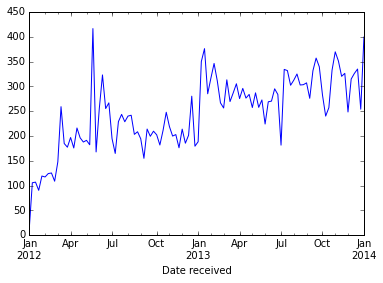

In [40]:
ts = ts.resample('W')

ts.plot()
plt.show()

A first or second difference is used to de-trend it---this indicates that we must use an `ARIMA(p,d,q)` model with `d=1` or `d=2` to describe it.

Let us compute and visualize the first differences series `ts[date] - ts[date-1]`.

> In `pandas`, we have a nice method to compute differences with any period: `ts.diff(periods=k)`.

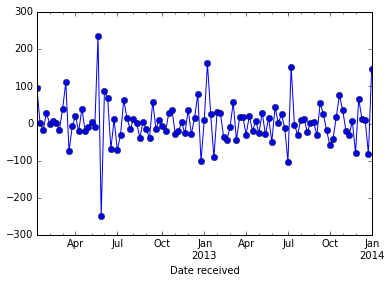

In [41]:
ts_1st_diff = ts.diff(periods=1)[1:]

ts_1st_diff.plot(marker='o')
plt.show()

It looks indeed as a stationary series.  We will thus choose `d=1` for our ARIMA model.  Next, is the visualization of the correlograms of this new time series.  We have two methods to perform this task: a basic autocorrelation and lag plot from `pandas`, and a set of more sophisticated correlograms from `statsmodels.api.graphics.tsa`.


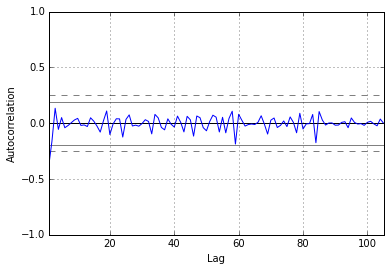

In [42]:
from pandas.tools.plotting import autocorrelation_plot, lag_plot

autocorrelation_plot(ts_1st_diff)
plt.show()

This gives us the previous diagram, showing the correlation of the data with itself at varying time lags (from 0 to 1000 days, in this case).  The solid black line corresponds to the 95% confidence band, and the dashed line to the 99% confidence band.

In the case of non-random time series, one or more of the autocorrelations will be significantly non-zero.  Note that, in our case, this plot is a good case for randomness.

The lag plot reinforces this view.


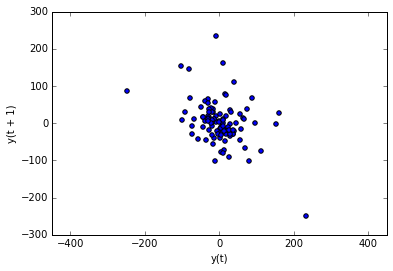

In [43]:
lag_plot(ts_1st_diff, lag=1)
plt.axis('equal')
plt.show()

In this case, we have chosen a lag plot of 1 days, which shows neither symmetry nor significant structure.

The `statsmodels` libraries excel in the treatment of time series through its submodules `tsa` and `api.graphics.tsa`.  For example, to perform an autocorrelation as before, but this time restricting the lags to 40, we issue `sm.graphics.tsa.plot_acf`.  We may also perform partial autocorrelations as well, with `sm.graphics.tsa.plot_pacf`.

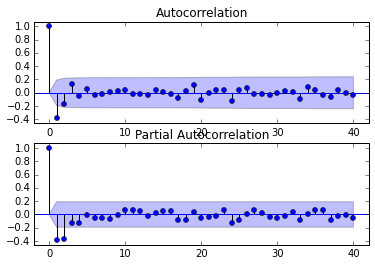

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_acf(ts_1st_diff, lags=40, alpha=0.05, ax=ax1)
sm.graphics.tsa.plot_pacf(ts_1st_diff, lags=40, alpha=0.05, ax=ax2)
plt.show()

A different way to present the autocorrelation function, but equally effective.  Note how we have control over the confidence band.  Out choice of `alpha` determines its meaning---in this case, for example, by choosing `alpha=0.05` we have imposed a 95% confidence band.

To present the corresponding values to the computed autocorrelations, we use the routines `acf` and `pacf` from the submodule `statsmodels.tsa.stattools`


In [45]:
from statsmodels.tsa.stattools import acf, pacf

acf(ts_1st_diff, nlags=40)

array([ 1.        , -0.38636166, -0.16209701,  0.13397057, -0.0555708 ,
        0.05048394, -0.0407119 , -0.02082811,  0.0040006 ,  0.02907198,
        0.04330283, -0.02011055, -0.01537464, -0.02978855,  0.04849505,
        0.01825439, -0.02593023, -0.07966487,  0.02102888,  0.10951272,
       -0.10171504, -0.00645926,  0.03973507,  0.03865624, -0.12395291,
        0.03391616,  0.07447618, -0.02474901, -0.01742892, -0.02676263,
       -0.00276295,  0.03135769,  0.0155686 , -0.09556651,  0.07881427,
        0.04804349, -0.03797063, -0.05942366,  0.03913402, -0.00854744,
       -0.03463874])

In [46]:
pacf(ts_1st_diff, nlags=40)

array([ 1.        , -0.39007667, -0.37436812, -0.13265923, -0.14290863,
       -0.00457552, -0.05168091, -0.05241386, -0.07909324, -0.01776889,
        0.06631977,  0.07931566,  0.0567529 , -0.02606054,  0.02271939,
        0.05509316,  0.06013166, -0.09309867, -0.11283787,  0.03704051,
       -0.06223677, -0.05993707, -0.03659954,  0.07764279, -0.16189567,
       -0.11602938,  0.00638008,  0.09157757,  0.04046057, -0.04838127,
       -0.08806197, -0.02527639,  0.06392126, -0.13768596,  0.00641743,
        0.11618549,  0.12550781, -0.14070774, -0.05995693, -0.0024937 ,
       -0.0905665 ])

In view of the correlograms computed above, we have a `MA(1)` signature: there is a single negative spike in the ACF plot, and a decay pattern (from below) in the PACF plot.  A sensible choice of parameters for the ARIMA model is then `p=0`, `q=1`, `d=1` (this corresponds to a simple exponential smoothing model, possibly with a constant term added).  Let us then proceed with the model description and further forecasting, with this choice.

In [54]:
from statsmodels.tsa import arima_model

model = arima_model.ARIMA(ts, order=(0,1,1)).fit()

The method `fit` of the class `arima_model.ARIMA` creates a new class in `statsmodels.tsa`, `arima_model_ARIMAResults`, that holds all the information we need, and a few methods to extract it.

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  105
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -555.940
Method:                       css-mle   S.D. of innovations             48.047
Date:                Mon, 27 Jul 2015   AIC                           1117.881
Time:                        13:11:38   BIC                           1125.843
Sample:                    01-08-2012   HQIC                          1121.107
                         - 01-05-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.4303      1.330      1.827      0.071        -0.177     5.038
ma.L1.D.y     -0.7246      0.070    -10.341      0.000        -0.862    -0.587
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.3800           +0.0000j            1.3800            0.0000
-----------------------------------------------------------------------------
"""

Let us observe the correlograms of the residuals.  We may compute those values using the method `resid` of the object `model`.


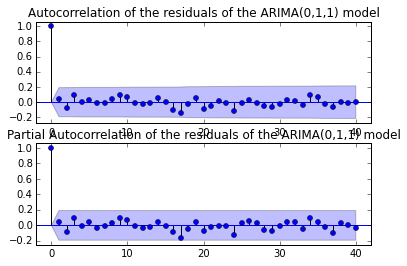

In [56]:
residuals = model.resid

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_acf(residuals, lags=40, alpha=0.05, ax=ax1)
ax1.set_title('Autocorrelation of the residuals of the ARIMA(0,1,1) model')
sm.graphics.tsa.plot_pacf(residuals, lags=40, alpha=0.05, ax=ax2)
ax2.set_title('Partial Autocorrelation of the residuals of the ARIMA(0,1,1) model')
plt.show() 

These plots suggest that we chose a good model. It only remains to produce a forecasting using it.  For this we employ the method `predict` in the object `model`.  For instance, a prediction for the first weeks in the year 2014, performed by considering all data since October 2013, could be performed as follows:

In [57]:
np.where((ts.index.year==2013) & (ts.index.month==10))

(array([92, 93, 94, 95]),)

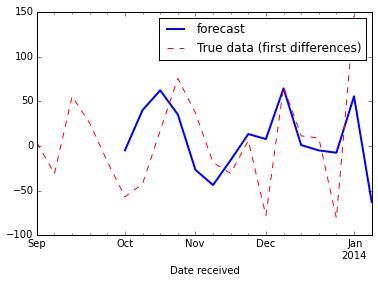

In [59]:
prediction = model.predict(start=92, end='1/15/2014')

prediction['10/2013':].plot(lw=2, label='forecast')
ts_1st_diff['9/2013':].plot(style='--', color='red', label='True data (first differences)')
plt.legend()
plt.show()